In [2]:
#picaso
from picaso import justdoit as jdi 
from picaso import justplotit as jpi
#plotting
jpi.output_notebook()

Loading BokehJS ...

In [3]:
opacity = jdi.opannection(wave_range=[0.5,2])

Turning off Raman for Non-H2 atmosphere


<IPython.core.display.Javascript object>


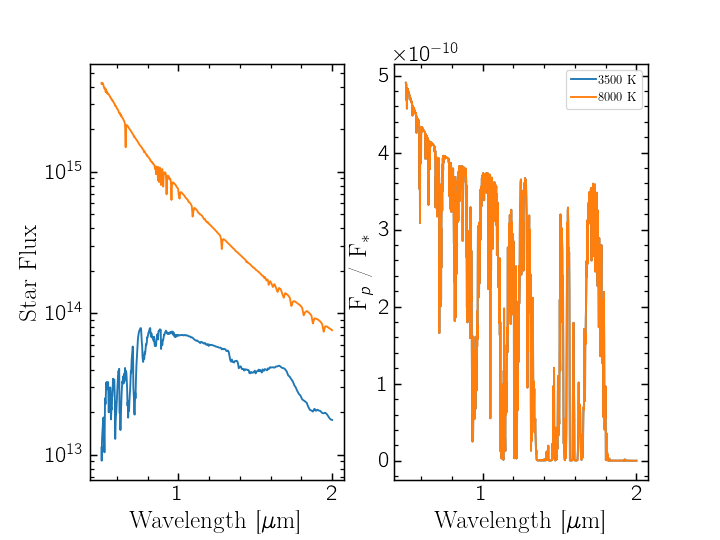

3500
8000


In [4]:


planet = jdi.inputs()
#phase angle 
planet.phase_angle(0) #radians
#gravity: Set up a 1 Rearth and 1 Mearth planet:
planet_mass = 1 #Mearth
planet_radius = 1 #Rearth
planet.gravity(radius=planet_radius,radius_unit=jdi.u.Unit('R_earth'), 
             mass=planet_mass,mass_unit=jdi.u.Unit('M_earth')) 
# Atm: using the simple PT profile from the tutorial notebook #3
planet.atmosphere(df=pd.DataFrame({'pressure':np.logspace(-6,0,40),
                         'temperature':np.linspace(100,270,40), #very fake temperature profile with a 270 K suface
                         'H2O':np.zeros(40)+0.01,
                         'CO2':np.zeros(40)+1-0.01}))
# Surface reflectivity:
planet.surface_reflect(0.3,opacity.wno) #this inputs the surface reflectivity and tells the code 
                                            #there is a hard surface

#define star 
star_planet_separation = 1 #au
StarTeffs = [3500,8000]
#pysynphot database, temp, metallicity, logg
metallicity = 0
logg = 4.0

%matplotlib notebook
fig, axs = plt.subplots(nrows=1, ncols=2)
ax1 = axs[0]
ax2 = axs[1]
ax1.set_xlabel(r"Wavelength [$\mu$m]")
ax1.set_ylabel('Star Flux')
ax2.set_xlabel(r"Wavelength [$\mu$m]")
ax2.set_ylabel(r"F$_{p}$ / F$_{*}$")

for i,StarTeff in enumerate(StarTeffs):
    print(StarTeff)
    planet.star(opacity,
                StarTeff,
                metallicity,
                logg,
                semi_major=star_planet_separation, 
                semi_major_unit=jdi.u.Unit('au')) 
    
    um = 1e4/planet.inputs['star']['wno']
    f = planet.inputs['star']['flux']
    ax1.plot(um,f)
    ax1.set_yscale('log')
    
    df = planet.spectrum(opacity)
    wno, alb, fpfs = df['wavenumber'],df['albedo'],df['fpfs_reflected']
    wno, fpfs = jdi.mean_regrid(wno, fpfs , R=1000)
    ax2.plot(1e4/wno, fpfs, label=str(StarTeff)+' K')

ax2.legend()
